Fall 2024
<img src="https://www.cuipcairo.org/sites/default/files/styles/medium/public/49658177_2020840098011471_2893445443553853440_n.png?itok=672tzxcF"
 width="80px" align="right">

DSAI 308, Deep Learning

University of Science and Technology, Zewail City

<br>

<h1 align="center"></h3>
<h1 align="center">Lab 7</h3>
<h1 align="center">Convolutional Autoencoder</h3>

---

#Denoising AutoEncoder

##Data Loading

In [ ]:
import keras
import tensorflow as tf
from keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model
from keras.models import Model
from keras.datasets import fashion_mnist,mnist
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


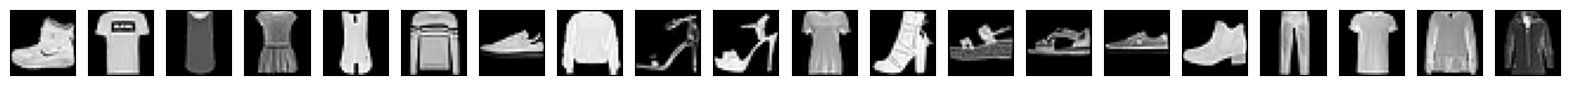

In [ ]:
def show_images(data, number_of_images):
    n = number_of_images
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(data[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()
show_images(X_train,20)

In [ ]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [ ]:
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

## Inducting Noise to Train and Test Data

In [ ]:
noise_factor = 0.5
X_train_noise = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noise = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

X_train_noise = np.clip(X_train_noise, 0., 1.)
X_test_noise = np.clip(X_test_noise, 0., 1.)


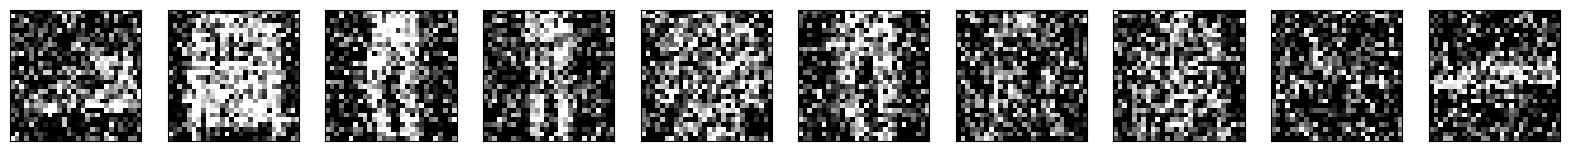

In [ ]:
show_images(X_test_noise,10)

## Autoencoders CNN Architecture
### The Encoder

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
input_img = Input(shape=(28, 28, 1))

x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

### The Decoder

In [ ]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

model = Model(input_img, decoded)
model.compile(optimizer='adam', loss='binary_crossentropy')

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

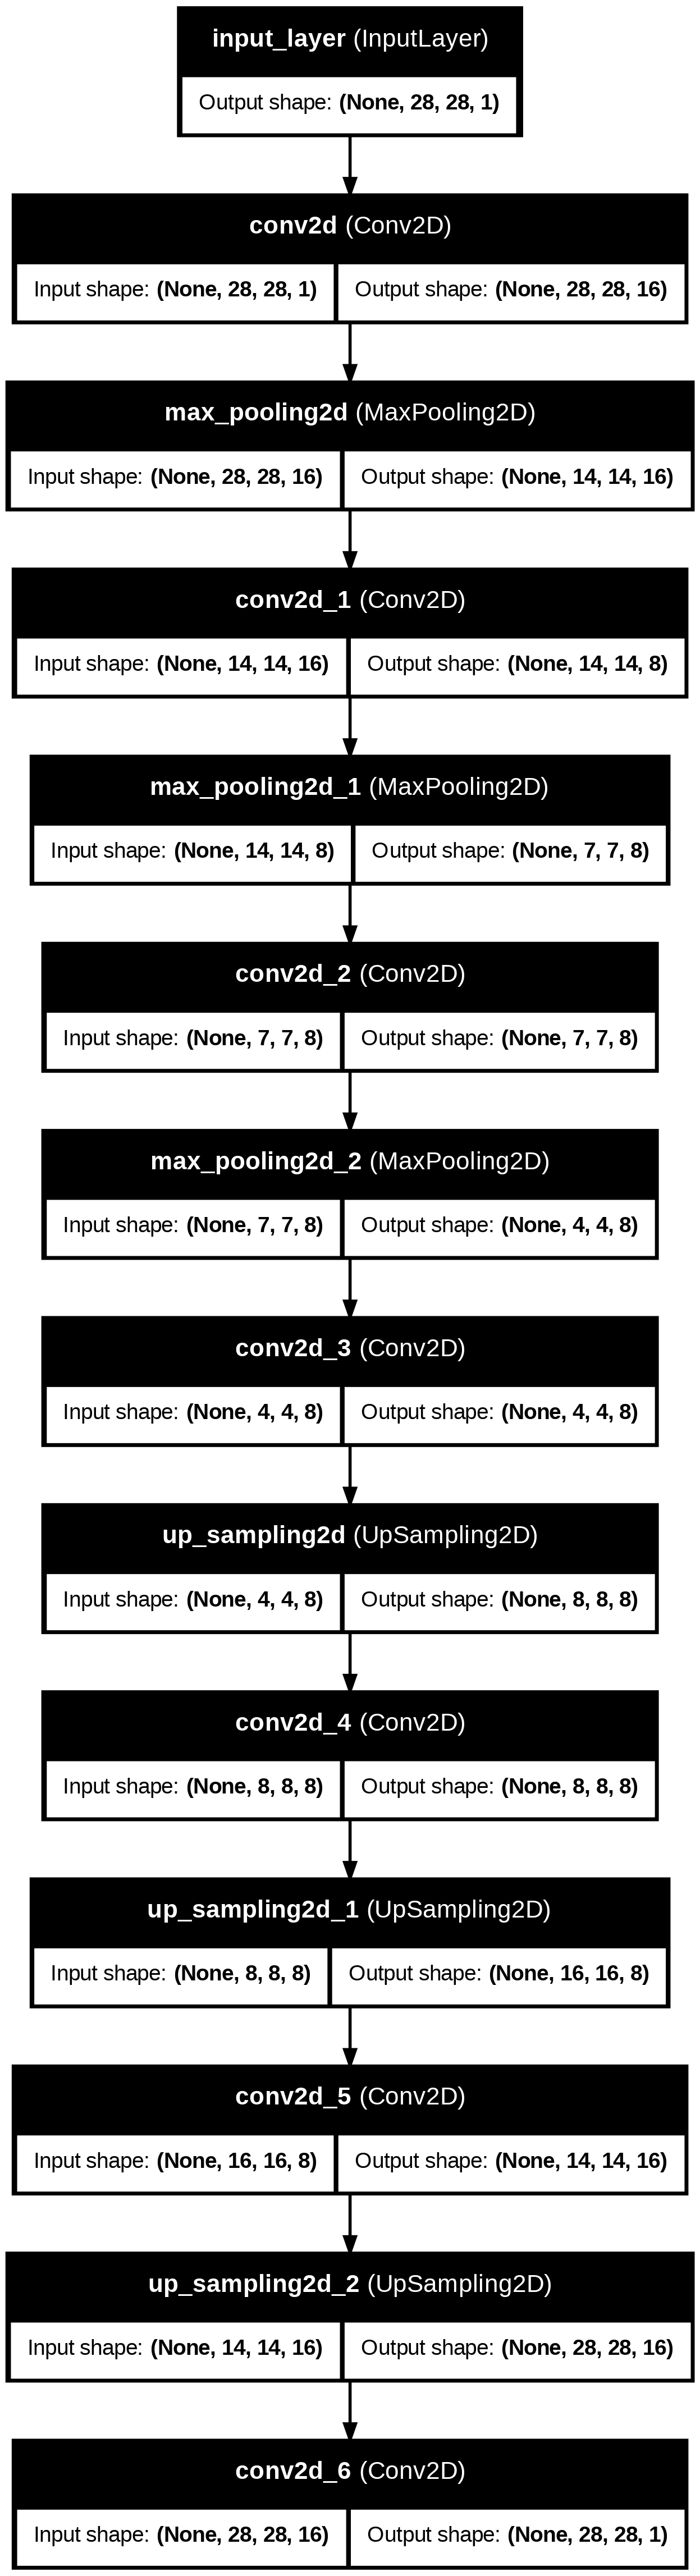

In [ ]:
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history_ = model.fit(X_train_noise, X_train,epochs=100,batch_size=128,shuffle=True,validation_data=(X_test_noise, X_test))

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3181 - val_loss: 0.3132
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3102 - val_loss: 0.3120
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3087 - val_loss: 0.3101
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3077 - val_loss: 0.3096
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3071 - val_loss: 0.3088
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3064 - val_loss: 0.3079
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3059 - val_loss: 0.3080
Epoch 8/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3054 - val_loss: 0.3075
Epoch 9/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3050 - val_loss: 0.3068
Epoch 10/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3048 - val_lo

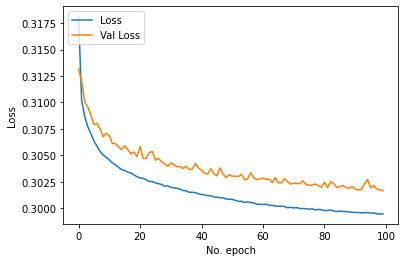

In [ ]:
plt.plot(history_.history['loss'], label='Loss')
plt.plot(history_.history['val_loss'], label='Val Loss')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
decoded_imgs = model.predict(X_test)

### Generating Results- Reconstruted Images,Noisy Images,Original Images

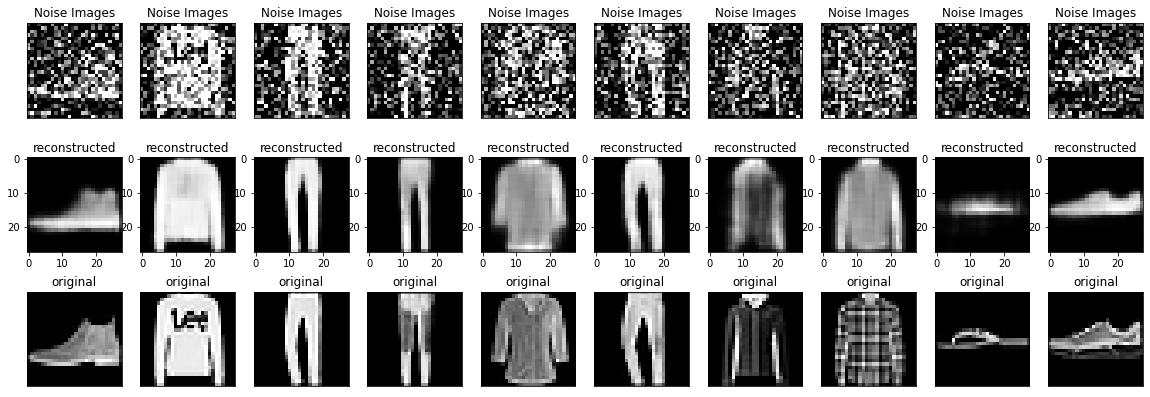

In [ ]:
n = 10
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n):
  bx = plt.subplot(3, n, i + 1)
  plt.title("Noise Images")
  plt.imshow(tf.squeeze(X_test_noise[i]))
  bx.get_xaxis().set_visible(False)
  bx.get_yaxis().set_visible(False)

  cx = plt.subplot(3, n, i + n + 1)
  plt.title("reconstructed")
  plt.imshow(tf.squeeze(decoded_imgs[i]))
  bx.get_xaxis().set_visible(False)
  bx.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, i + 2*n + 1)
  plt.title("original")
  plt.imshow(tf.squeeze(X_test[i]))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

#Super Resolution AutoEncoder

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image

import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Select a subset of images (you can adjust this as needed)
x_data = x_train[:1000]  # Adjust the number as needed
x_data1 = x_test[:1000]  # Adjust the number as needed

# Normalize the images
train_x = x_data / 255.0
val_x = x_data1 / 255.0

# Print the shape of the training and validation data
print("Training data shape:", train_x.shape)
print("Validation data shape:", val_x.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Training data shape: (1000, 32, 32, 3)
Validation data shape: (1000, 32, 32, 3)


##reduce the pictures resolution

In [ ]:
# function to reduce image resolution while keeping the image size constant
import math
def pixalate_image(image, scale_percent = 40):
  width = math.ceil(image.shape[1] * scale_percent / 100)
  height = math.ceil(image.shape[0] * scale_percent / 100)
  dim = (width, height)

  small_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

  # scale back to original size
  width = int(small_image.shape[1] * 100 / scale_percent)
  height = int(small_image.shape[0] * 100 / scale_percent)
  dim = (width, height)

  low_res_image = cv2.resize(small_image, dim, interpolation = cv2.INTER_AREA)

  return low_res_image

In [ ]:
# get low resolution images for the training set
train_x_px = []

for i in range(train_x.shape[0]):
  temp = pixalate_image(train_x[i,:,:,:])
  train_x_px.append(temp)

train_x_px = np.array(train_x_px)


# get low resolution images for the validation set
val_x_px = []

for i in range(val_x.shape[0]):
  temp = pixalate_image(val_x[i,:,:,:])
  val_x_px.append(temp)

val_x_px = np.array(val_x_px)

##Build the Model and Train it

In [ ]:
Input_img = Input(shape=(32, 32, 3))

#encoding architecture
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2))(x2)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)

# decoding architecture
x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
decoded = Conv2D(3, (3, 3), padding='same')(x1)

autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

a_e = autoencoder.fit(train_x_px, train_x,
            epochs=50,
            batch_size=256,
            shuffle=True,
            validation_data=(val_x_px, val_x),
            callbacks=[early_stopper])

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 52s 10s/step - loss: 0.6667 - val_loss: 0.1269
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 243ms/step - loss: 0.1865 - val_loss: 0.2761
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - loss: 0.2635 - val_loss: 0.2410
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - loss: 0.2089 - val_loss: 0.0531
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - loss: 0.0705 - val_loss: 0.0489
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - loss: 0.0567 - val_loss: 0.0529
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - loss: 0.0495 - val_loss: 0.0435
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - loss: 0.0438 - val_loss: 0.0374
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - loss: 0.0379 - val_loss: 0.0348
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - loss: 0.0341 - val_loss: 0.0280
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - loss: 0.0273 - val_loss: 0.0227
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - loss: 0.0236 - val_lo

##Plot some resulted pictures

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


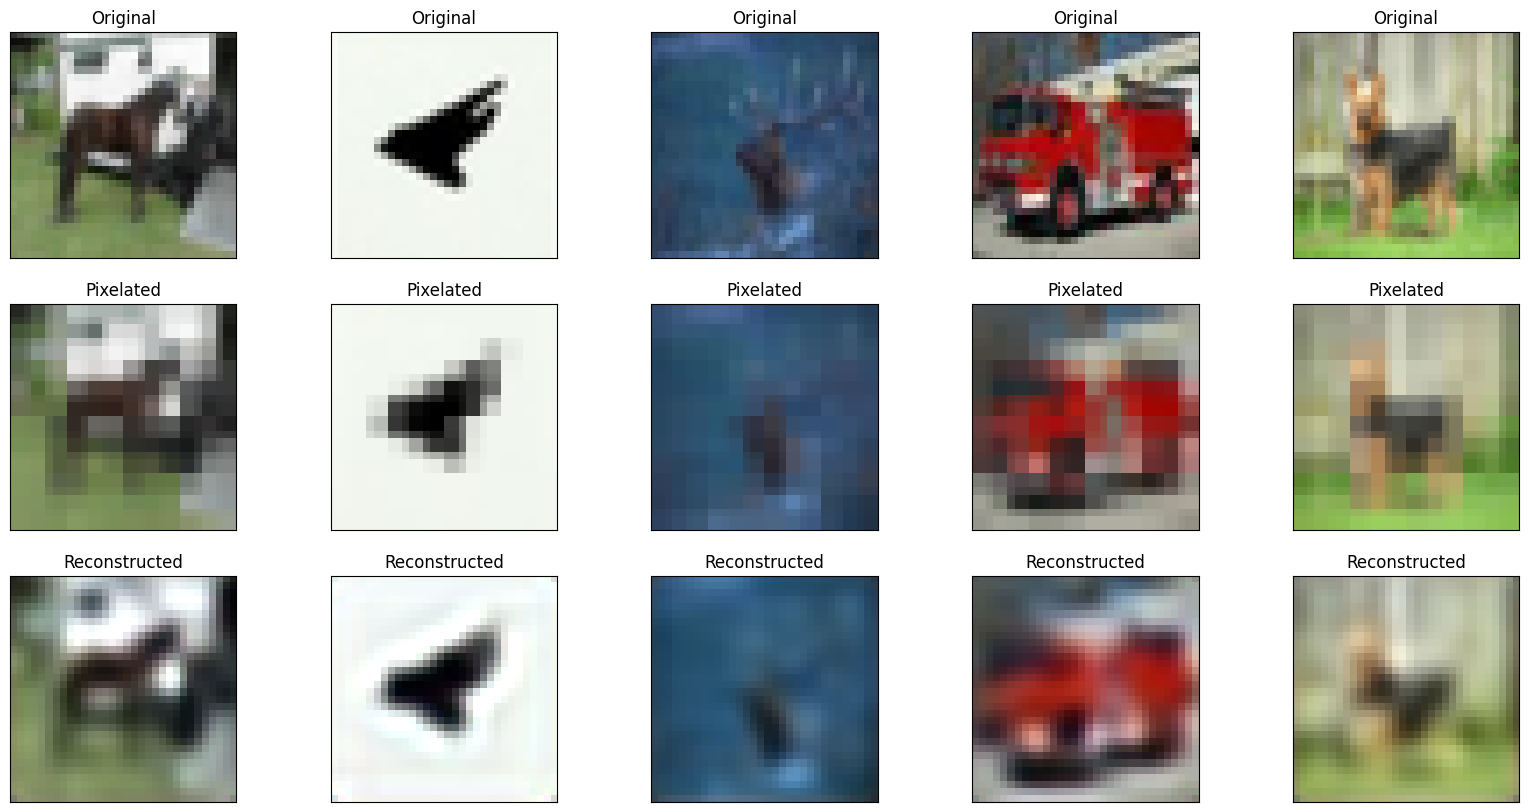

In [ ]:
import matplotlib.pyplot as plt

n = 5
plt.figure(figsize=(20, 10))

# Generate predictions using the trained autoencoder model
predictions = autoencoder.predict(val_x_px)

for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)  # 3 rows now
    plt.imshow(val_x[i + 20])  # Display original image
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Original")

    # Pixelated image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(val_x_px[i + 20])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Pixelated")

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + 2 * n)  # Third row for predictions
    plt.imshow(predictions[i + 20])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Reconstructed")

plt.show()

#Lab practice


* Change the dataset of the Denoising Autoencoder from Fashion minst to Cifar10.
* Try to enhance the predicted images of the Super Resolution Autoencoder through building your own model.

